## **PHASE 3: DATA PREPARATION (20 minutes)**

### **Requirements:**

**3.1 Feature Selection**
Select exactly these 12 features for the model:
- LIMIT_BAL (credit limit)
- AGE (customer age)
- PAY_0 (most recent payment status)
- PAY_2 (payment status 2 months ago)
- PAY_3 (payment status 3 months ago)
- BILL_AMT1 (most recent bill)
- PAY_AMT1 (most recent payment)
- payment_trend (your engineered feature)
- bill_volatility (your engineered feature)
- payment_ratio (your engineered feature)
- utilization (your engineered feature)
- num_delays (your engineered feature)

**3.2 Create Feature Matrix (X)**
- Extract the 12 selected features into matrix X
- Display shape of X

**3.3 Create Target Variable (y)**
- Extract the target column: 'default.payment.next.month'
- Display shape of y
- Verify values are only 0 and 1

**3.4 Handle Any Issues**
- Replace any infinite values with NaN
- Fill NaN values with median of that column
- Verify no missing values remain

**3.5 Train-Test Split**
- Split data: 80% training, 20% testing
- Use random_state=42 for reproducibility
- Use stratify on target variable (keeps same default rate in both sets)
- Display shapes of: X_train, X_test, y_train, y_test
- Display default rate in training set
- Display default rate in test set

**Deliverable:** Confirmation that:
- Training set has ~24,000 samples
- Test set has ~6,000 samples
- Default rates match in both sets
- No missing values in any set

---

(30000, 24)
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                     

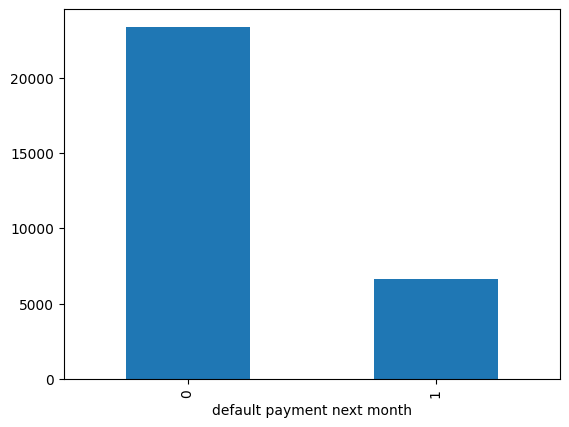

/Users/garimajaiswal/Learning/AI-ML/ai-ml-learning-journey/.venv/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,payment_trend,bill_volatility,payment_ratio,utilization,num_delays
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,4,1761.633219,0.000000,0.195650,2
2,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,-3,637.967841,0.000000,0.022350,2
3,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,0,6064.518593,0.051915,0.324878,0


In [41]:
import pandas as pd
from pandas import value_counts

# execute all the cells in the phase 2 notebook and make the variables available here
%run ./phase2_feature_engineering.ipynb

if False:
    original_data = pd.DataFrame()

# After the command finishes, all the variables from that notebook,
# like the 'original_data' DataFrame, will be available here.
original_data.head(3)

**3.1 Feature Selection Select exactly these 12 features for the model:**

    LIMIT_BAL (credit limit)
    AGE (customer age)
    PAY_0 (most recent payment status)
    PAY_2 (payment status 2 months ago)
    PAY_3 (payment status 3 months ago)
    BILL_AMT1 (most recent bill)
    PAY_AMT1 (most recent payment)
    payment_trend (your engineered feature)
    bill_volatility (your engineered feature)
    payment_ratio (your engineered feature)
    utilization (your engineered feature)
    num_delays (your engineered feature)

In [42]:
original_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'payment_trend', 'bill_volatility',
       'payment_ratio', 'utilization', 'num_delays'],
      dtype='object')

In [43]:
selected_features = original_data[['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2',
       'PAY_3',  'BILL_AMT1','PAY_AMT1', 'payment_trend', 'bill_volatility',
       'payment_ratio', 'utilization', 'num_delays']]
selected_features.head(3)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,PAY_AMT1,payment_trend,bill_volatility,payment_ratio,utilization,num_delays
1,20000,24,2,2,-1,3913,0,4,1761.633219,0.000000,0.195650,2
2,120000,26,-1,2,0,2682,0,-3,637.967841,0.000000,0.022350,2
3,90000,34,0,0,0,29239,1518,0,6064.518593,0.051915,0.324878,0


**3.2 Create Feature Matrix (X)**
- Extract the 12 selected features into matrix X
- Display shape of X

**3.3 Create Target Variable (y)**
- Extract the target column: 'default.payment.next.month'
- Display shape of y
- Verify values are only 0 and 1

In [44]:
X = selected_features.copy()
X.shape

(30000, 12)

In [45]:
y = original_data['default payment next month'].copy()
# y.shape
print(y.isin([0,1]).value_counts()==len(y))

default payment next month
True    True
Name: count, dtype: bool


**3.4 Handle Any Issues**
- Replace any infinite values with NaN
- Fill NaN values with median of that column
- Verify no missing values remain



In [48]:
import numpy as np

# Replace infinite values with NaN first (CRITICAL STEP)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

for feature in X:
    X[feature].fillna(X[feature].median(),inplace=True)

# Verify no missing values remain
print("Missing values remaining:", X.isna().sum().sum())
X.head(3)

y= pd.to_numeric(y)
print(y.info())


Missing values remaining: 0
<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 1 to 30000
Series name: default payment next month
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB
None


**3.5 Train-Test Split**
- Split data: 80% training, 20% testing
- Use random_state=42 for reproducibility
- Use stratify on target variable (keeps same default rate in both sets)
- Display shapes of: X_train, X_test, y_train, y_test
- Display default rate in training set
- Display default rate in test set



In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(f"\nDefault Rate (Train): {y_train.mean():.4f}")
print(f"Default Rate (Test):  {y_test.mean():.4f}")


(24000, 12)
(6000, 12)
(24000,)
(6000,)

Default Rate (Train): 0.2212
Default Rate (Test):  0.2212


**Deliverable:** Confirmation that:
- Training set has ~24,000 samples
- Test set has ~6,000 samples
- Default rates match in both sets
- No missing values in any set
